In [1]:
# import libraries
import keras
from utils.preprocess import *
from config import *

In [2]:
# load dataset
dataset = load_unipen_dataset(no_cap)

# normalize dataset
def normalize(data, label):
    return tf.cast(data, tf.float32) / 255.0, label

if normalize_dataset:
    dataset = dataset.map(normalize)
dataset = dataset.shuffle(10000).batch(64)

In [3]:
# load model
target_model = "unipen_no_cap_model" if no_cap else "unipen_model"
model = keras.models.load_model(f"data/{target_model}.h5")

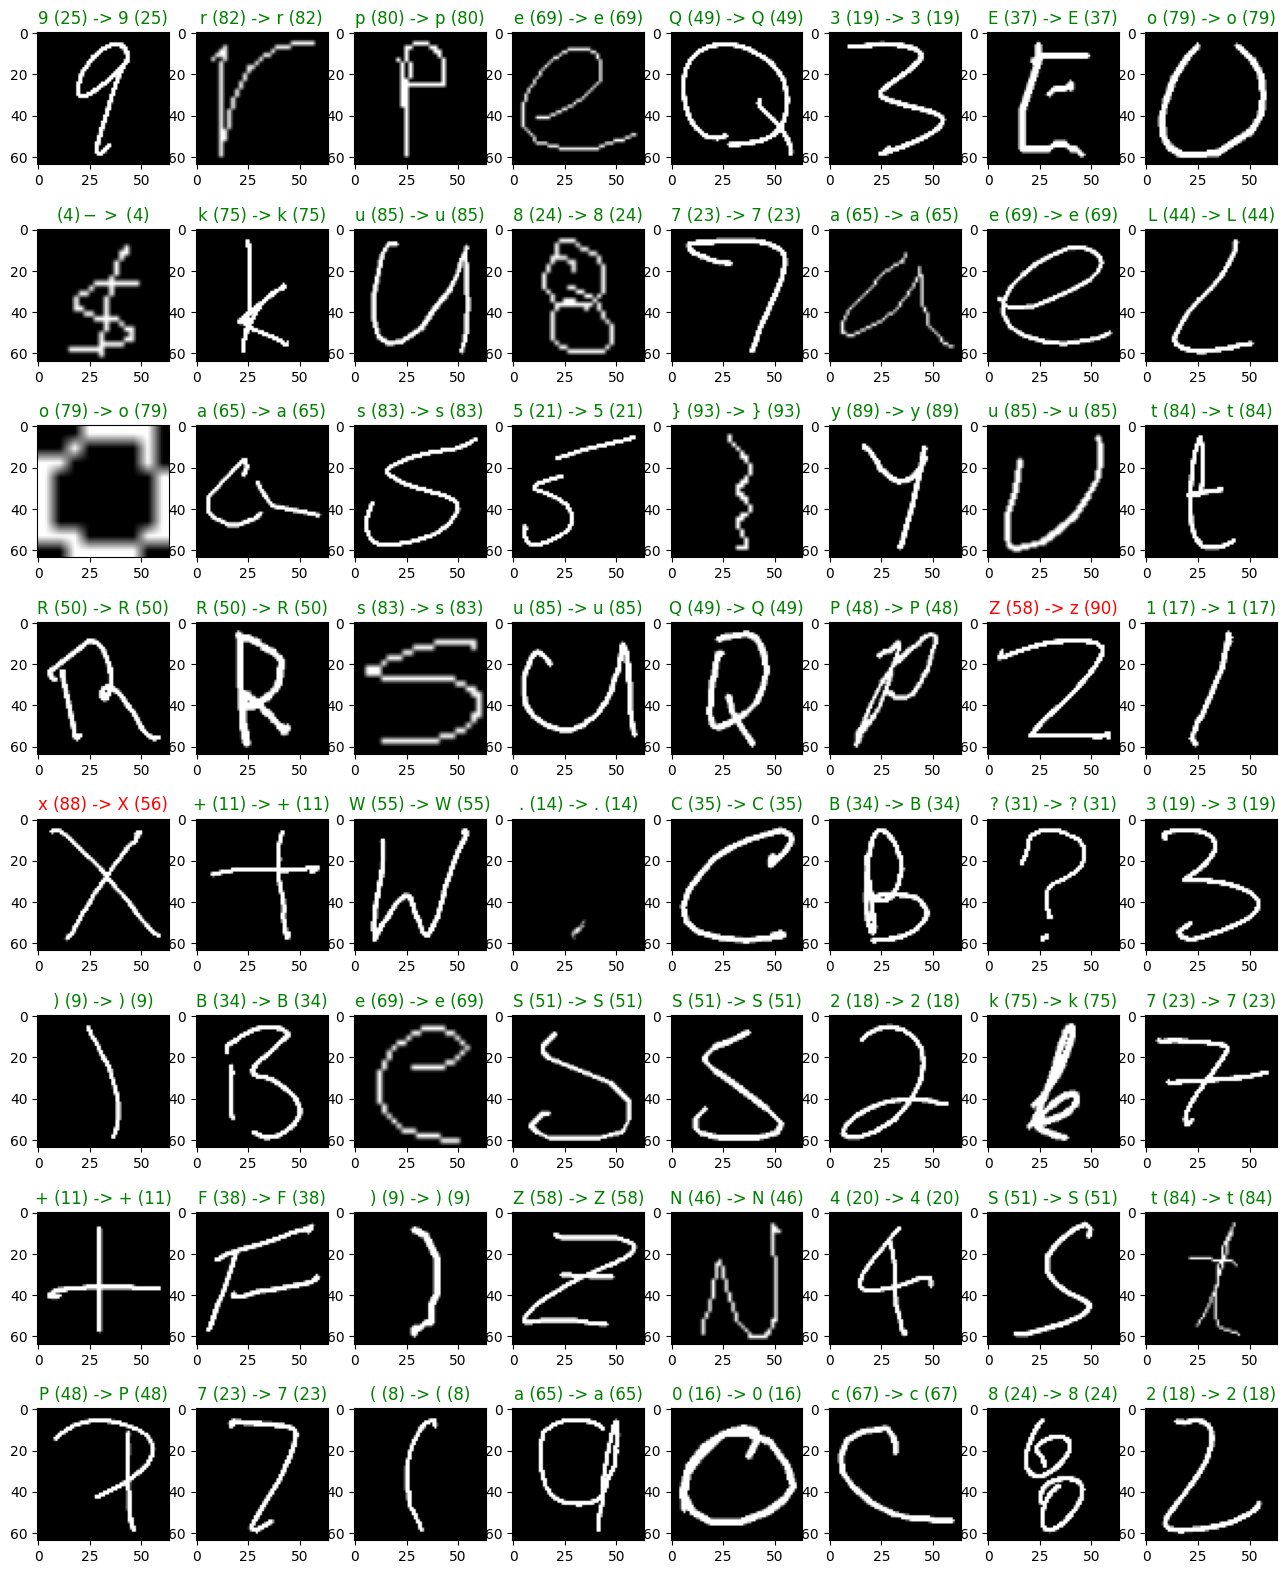

In [4]:
# predict & plot
from utils.demonstration import plot_digits

for img, label in dataset.take(1):
    prediction = model.predict(img, verbose=0)
    plot_digits(img.numpy(), label.numpy(), prediction, (8, 8))